# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
ratings=[]
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)
   

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    # Find review texts
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    

    ratings_tags = parsed_content.find_all("div", {"itemprop": "reviewRating"})
    for rec in ratings_tags:
        # Extract ratingValue and append it to the ratings list
        rating_value = rec.find("span", {"itemprop": "ratingValue"}).get_text(strip=True)
        ratings.append(int(rating_value))  
    
    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(ratings)} total ratings")


Scraping page 1
   ---> 100 total reviews
   ---> 100 total ratings
Scraping page 2
   ---> 200 total reviews
   ---> 200 total ratings
Scraping page 3
   ---> 300 total reviews
   ---> 300 total ratings
Scraping page 4
   ---> 400 total reviews
   ---> 400 total ratings
Scraping page 5
   ---> 500 total reviews
   ---> 500 total ratings
Scraping page 6
   ---> 600 total reviews
   ---> 600 total ratings
Scraping page 7
   ---> 700 total reviews
   ---> 700 total ratings
Scraping page 8
   ---> 800 total reviews
   ---> 800 total ratings
Scraping page 9
   ---> 900 total reviews
   ---> 900 total ratings
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total ratings


In [3]:
df = pd.DataFrame()

df["reviews"] = reviews
df["ratings"]=ratings
df.head()

,reviews,ratings
0,✅ Trip Verified | I’ve flown with many airline...,1
1,✅ Trip Verified | I recently flew from New Y...,8
2,Not Verified | BA business class in Europe h...,4
3,✅ Trip Verified | Our flight started in Seattl...,1
4,✅ Trip Verified | British Airways Flight fro...,4


In [4]:
df['ratings'].value_counts()

ratings
1     376
2     115
3      93
8      81
10     81
9      75
4      59
5      46
7      39
6      35
Name: count, dtype: int64

In [5]:
df['reviews'][0]

'✅ Trip Verified | I’ve flown with many airlines, but my recent experience with British Airways left much to be desired. The in-flight entertainment was underwhelming, and I was disappointed by the lack of basic amenities, such as a comfort kit with essentials like eye masks. While the only positive aspect was the slightly more generous legroom, overall, I found the service to be far below expectations. Not impressed.'

In [6]:
df['ratings'].value_counts()

ratings
1     376
2     115
3      93
8      81
10     81
9      75
4      59
5      46
7      39
6      35
Name: count, dtype: int64

In [7]:
# Ensure data folder exists
if not os.path.exists('data'):
    os.makedirs('data')

In [8]:
df.to_csv("data/BA_reviews.csv", index=False)
print("Data saved to data/BA_reviews.csv")

Data saved to data/BA_reviews.csv


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## 1. Data Preprocessing and Cleaning

In [9]:
df['reviews'] = df['reviews'].str.split('|',expand=True)[1]

df.head(5)

,reviews,ratings
0,"I’ve flown with many airlines, but my recent ...",1
1,I recently flew from New York back to Londo...,8
2,BA business class in Europe has a seat the ...,4
3,Our flight started in Seattle Wa heading to L...,1
4,British Airways Flight from Edinburgh got d...,4


In [10]:
df['reviews']=df['reviews'].str.lower()
df.head(8)

,reviews,ratings
0,"i’ve flown with many airlines, but my recent ...",1
1,i recently flew from new york back to londo...,8
2,ba business class in europe has a seat the ...,4
3,our flight started in seattle wa heading to l...,1
4,british airways flight from edinburgh got d...,4
5,british airways world traveller plus (premi...,5
6,ba is barely a step above low cost airlines...,2
7,happy with the flight crew. hadn't been on a...,10


In [11]:
from nltk.corpus import stopwords
import re
%pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [12]:
df.isnull().sum()

reviews    0
ratings    0
dtype: int64

In [13]:


## Removing special characters
df['reviews']=df['reviews'].apply(lambda x:re.sub('[^A-Z a-z 0-9-]+',' ',x))

## Remove the stopswords
df['reviews']=df['reviews'].apply(lambda x:" ".join([y for y in x.split() if y not in stopwords.words('english')])) #if y(word) not in the stopword then join back to sentence

## Remove url
df['reviews']=df['reviews'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) #https://www.linkedin.com/

## Remove html tags
df['reviews']=df['reviews'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

## Remove any additional spaces
df['reviews']=df['reviews'].apply(lambda x: " ".join(x.split()))

df.head(8)

,reviews,ratings
0,flown many airlines recent experience british ...,1
1,recently flew new york back london ba first lo...,8
2,ba business class europe seat economy simply e...,4
3,flight started seattle wa heading lisbon portu...,1
4,british airways flight edinburgh got delayed 1...,4
5,british airways world traveller plus premium e...,5
6,ba barely step low cost airlines try dime nick...,2
7,happy flight crew plane 20 years stressed made...,10


In [14]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [15]:
df['reviews']=df['reviews'].apply(lambda x:lemmatize_words(x))
df.head(5)

,reviews,ratings
0,flown many airline recent experience british a...,1
1,recently flew new york back london ba first lo...,8
2,ba business class europe seat economy simply e...,4
3,flight started seattle wa heading lisbon portu...,1
4,british airway flight edinburgh got delayed 1 ...,4


In [16]:
df.isnull().sum()

reviews    0
ratings    0
dtype: int64

In [17]:

df['ratings']=df['ratings'].apply(lambda x:0 if x<=3 else 1)
df.head(8)

,reviews,ratings
0,flown many airline recent experience british a...,0
1,recently flew new york back london ba first lo...,1
2,ba business class europe seat economy simply e...,1
3,flight started seattle wa heading lisbon portu...,0
4,british airway flight edinburgh got delayed 1 ...,1
5,british airway world traveller plus premium ec...,1
6,ba barely step low cost airline try dime nicke...,0
7,happy flight crew plane 20 year stressed made ...,1


In [18]:
df['ratings'].unique()

array([0, 1])

In [19]:
df['ratings'].value_counts()

ratings
0    584
1    416
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['reviews'],df['ratings'],test_size=0.20)  

In [21]:
df.shape

(1000, 2)

In [22]:
X_train.shape

(800,)

In [23]:
X_test.shape

(200,)

In [24]:
X_train_tokens = [text.split() for text in X_train] #Tokenize the text into lists of words
X_train_tokens

[['check',
  'shamble',
  'bwi',
  '3',
  'counter',
  'open',
  'full',
  'flight',
  'bag',
  'drop',
  'queue',
  'even',
  'longer',
  'regular',
  'check-in',
  'queue',
  'boarding',
  'done',
  'zone',
  'carried',
  'reasonably',
  'well',
  'board',
  'fa',
  'fine',
  'engaging',
  'outbound',
  'flight',
  'iad',
  'aircraft',
  'cramped',
  'seat',
  'economy',
  'horrible',
  'seated',
  'aisle',
  'seat',
  'row',
  'f',
  'entertainment',
  'box',
  'taking',
  'third',
  'legroom',
  'overall',
  'cramped',
  'seat',
  'poor',
  'legroom',
  'awful',
  'ife',
  'screen',
  'meal',
  'mediocre',
  'bar',
  'service',
  'meal',
  'time',
  'lading',
  'served',
  'hot',
  'sandwich',
  'oozing',
  'cheese',
  'wrapper',
  'pleasant',
  'handle',
  'tasted',
  'good',
  'plane',
  'landed',
  'remote',
  'stand',
  'meant',
  'bussed',
  't5',
  'since',
  'raining',
  'nice',
  'experience',
  'overall',
  'rate',
  'mediocre',
  'journey'],
 ['worst',
  'journey',
  'lif

In [25]:
import gensim
from gensim.models import Word2Vec

w2v_model=Word2Vec(X_train_tokens)

In [26]:
print(X_train_tokens[0])

['check', 'shamble', 'bwi', '3', 'counter', 'open', 'full', 'flight', 'bag', 'drop', 'queue', 'even', 'longer', 'regular', 'check-in', 'queue', 'boarding', 'done', 'zone', 'carried', 'reasonably', 'well', 'board', 'fa', 'fine', 'engaging', 'outbound', 'flight', 'iad', 'aircraft', 'cramped', 'seat', 'economy', 'horrible', 'seated', 'aisle', 'seat', 'row', 'f', 'entertainment', 'box', 'taking', 'third', 'legroom', 'overall', 'cramped', 'seat', 'poor', 'legroom', 'awful', 'ife', 'screen', 'meal', 'mediocre', 'bar', 'service', 'meal', 'time', 'lading', 'served', 'hot', 'sandwich', 'oozing', 'cheese', 'wrapper', 'pleasant', 'handle', 'tasted', 'good', 'plane', 'landed', 'remote', 'stand', 'meant', 'bussed', 't5', 'since', 'raining', 'nice', 'experience', 'overall', 'rate', 'mediocre', 'journey']


In [27]:
w2v_model.wv['delayed'].shape

(100,)

In [28]:
import numpy as np
def avg_word2vec(doc):

    return np.mean([w2v_model.wv[word] for word in doc if word in w2v_model.wv.index_to_key],axis=0)

In [29]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [30]:
from tqdm import tqdm  #tqdm gives a  progress bar to visualize the loop's progress.

#apply word2vec on every sentences

X_train_word2vec=[]
for i in tqdm(range(len(X_train_tokens))):
    X_train_word2vec.append(avg_word2vec(X_train_tokens[i]))

100%|██████████| 800/800 [00:00<00:00, 2912.96it/s]


In [31]:
X_word2vec_train = np.array(X_train_word2vec)
X_word2vec_train.shape

(800, 100)

In [32]:
X_test_tokens = [text.split() for text in X_test]

X_word2vec_test = []

for i in tqdm(range(len(X_test_tokens))):
    X_word2vec_test.append(avg_word2vec(X_test_tokens[i]))

# Convert test data to numpy array
X_word2vec_test = np.array(X_word2vec_test)

X_word2vec_test.shape

100%|██████████| 200/200 [00:00<00:00, 2551.47it/s]


(200, 100)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
nb_model_wv =GaussianNB().fit(X_word2vec_train,y_train)
y_pred_word2vec=nb_model_wv.predict(X_word2vec_test)
print("wor2vec accuracy: ",accuracy_score(y_test,y_pred_word2vec))

wor2vec accuracy:  0.705


In [34]:


#Apply Bow
from sklearn.feature_extraction.text import CountVectorizer

bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train).toarray()
X_test_bow=bow.transform(X_test).toarray()
nb_model_bow=GaussianNB().fit(X_train_bow,y_train)
y_pred_bow=nb_model_bow.predict(X_test_bow)
print("BOW accuracy: ",accuracy_score(y_test,y_pred_bow))


#Apply TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train).toarray()
X_test_tfidf=tfidf.transform(X_test).toarray()

nb_model_tfidf=GaussianNB().fit(X_train_tfidf,y_train)
y_pred_tfidf=nb_model_bow.predict(X_test_tfidf)
print("TFIDF accuracy: ",accuracy_score(y_test,y_pred_tfidf))

BOW accuracy:  0.725
TFIDF accuracy:  0.71


In [35]:
print(classification_report(y_test,y_pred_word2vec))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75       124
           1       0.59      0.71      0.65        76

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.70      0.71       200



Text(0.5, 1.0, 'Confusion Matrix')

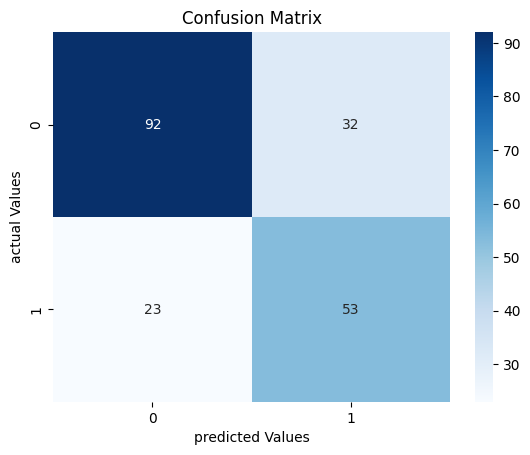

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_bow)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
# Add labels and title
plt.xlabel('predicted Values')
plt.ylabel('actual Values')
plt.title('Confusion Matrix')

In [37]:
sentiment_counts = pd.Series(y_pred_bow).value_counts()
sentiment_counts

0    115
1     85
Name: count, dtype: int64

In [38]:
sentiment_counts.index = ['Negative', 'Positive'] 

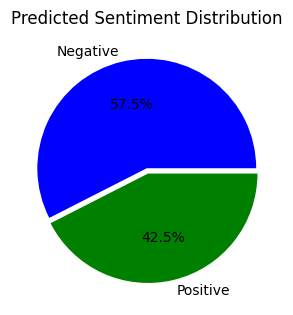

In [39]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 2)
plt.title("Predicted Sentiment Distribution")
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, explode=(0, 0.05),autopct='%1.1f%%', shadow=False, colors=("blue", "green"))# explode the Positive slice
plt.show()

In [40]:
df_test = pd.DataFrame({'reviewText': X_test, 'rating': y_test, 'predicted_sentiment': y_pred_bow})
df_test.head()


,reviewText,rating,predicted_sentiment
200,connecting flight london glasgow canceled forc...,0,1
288,first time flying ba business class never boar...,0,1
892,london malaga terminally ill airline packed cl...,0,0
361,ba changed prepaid seat last minute charged u ...,0,0
463,baby across aisle cried nonstop crew yakked ga...,0,1
